#SVM

In [0]:
import pandas as pd 
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline 

import matplotlib.pyplot as plt

In [5]:
cell_df = pd.read_csv("cell_samples.csv") #700 data items 
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


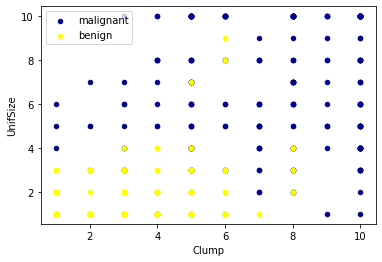

In [41]:
ax = cell_df[cell_df['Class'] == 4][0:600].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:600].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

#Class 2 is good, Class 4 is bad cell. 
#using the first 50 data graphing, you can get how the data look like, so to decide which kernel function you need to use. 
#use many different combinataions of independent features to draw the graph. 

In [7]:
cell_df.dtypes #check all the data type can be used for SVM (numerical data required)

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [9]:
#change "BareNuc" to integer values (Preprocessing to change the other data types  to numerical data)

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors = 'coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [10]:
#We need X, y (for Training)
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [11]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [0]:
#Split the data to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
X_test.shape

(137, 9)

In [16]:
#modelling with SVM
# Kernel = Linear 

from sklearn import svm
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
yhat_linear = clf_linear.predict(X_test)

In [18]:
yhat_linear[0:10]

array([2, 2, 4, 4, 2, 2, 2, 2, 2, 2])

In [21]:
#you can draw the confusion graph
from sklearn.metrics import classification_report
classification_report(y_test, yhat_linear)

'              precision    recall  f1-score   support\n\n           2       0.95      0.96      0.96        85\n           4       0.94      0.92      0.93        52\n\n    accuracy                           0.95       137\n   macro avg       0.95      0.94      0.95       137\nweighted avg       0.95      0.95      0.95       137\n'

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_linear, average='weighted') 

0.9488064763046207

In [23]:
clf_sigmoid = svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
yhat_sigmoid = clf_sigmoid.predict(X_test)

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

classification_report(y_test, yhat_sigmoid)
#f1_score(y_test, yhat_sigmoid, average='weighted') 

'              precision    recall  f1-score   support\n\n           2       0.51      0.65      0.57        85\n           4       0.00      0.00      0.00        52\n\n    accuracy                           0.40       137\n   macro avg       0.26      0.32      0.29       137\nweighted avg       0.32      0.40      0.36       137\n'

In [27]:
#circular kernel (radial basis function for the kernel)
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
yhat_rbf = clf_rbf.predict(X_test)

In [29]:
classification_report(y_test, yhat_rbf)

'              precision    recall  f1-score   support\n\n           2       0.96      0.96      0.96        85\n           4       0.94      0.94      0.94        52\n\n    accuracy                           0.96       137\n   macro avg       0.95      0.95      0.95       137\nweighted avg       0.96      0.96      0.96       137\n'

In [30]:
#in the textbook, Loglinear regression should be theoretically similar to SVM
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_LR = LR.predict(X_test)
classification_report(y_test, yhat_LR)

'              precision    recall  f1-score   support\n\n           2       0.93      0.93      0.93        85\n           4       0.88      0.88      0.88        52\n\n    accuracy                           0.91       137\n   macro avg       0.91      0.91      0.91       137\nweighted avg       0.91      0.91      0.91       137\n'

In [0]:
#if you need to reveal the probability, you need to use "Loglinear Regression", but for the 
#accuracy perspective, SVM would be your first resort!!!!



#PCA

In [31]:
#I am trying to use the same cell data...that was used above... 
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [33]:
y[0:5]

array([2, 2, 2, 2, 2])

In [0]:
#using PCA means we would like to see some overlapped information among the indepdent features (in this case, we have 9)
#before you apply PCA, one thing important is scaling (normalization)
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [35]:
X[0:5]

array([[ 0.19790469, -0.70221201, -0.74177362, -0.63936553, -0.5556085 ,
        -0.69885309, -0.18182716, -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299,  0.75803177,  1.69516613,
         1.77286724, -0.18182716, -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, -0.63936553, -0.5556085 ,
        -0.4242175 , -0.18182716, -0.61292736, -0.34839971],
       [ 0.55267873,  1.58320366,  1.6021918 , -0.63936553, -0.10545357,
         0.12505369, -0.18182716,  1.3540079 , -0.34839971],
       [-0.15686934, -0.70221201, -0.74177362,  0.05933312, -0.5556085 ,
        -0.69885309, -0.18182716, -0.61292736, -0.34839971]])

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5) #number of pincipal components 
principalComponents = pca.fit_transform(X) 
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [37]:
principalDf[0:8]

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-1.470171,-0.104273,-0.565685,-0.031959,-0.150998
1,1.442046,-0.570141,0.236601,-0.478150,1.643085
2,-1.592478,-0.076120,0.048858,-0.092388,-0.059739
3,1.479812,-0.528452,-0.603048,1.410827,-0.560737
4,-1.344862,-0.090719,0.029997,-0.338284,-0.108829
5,5.014326,-1.534917,0.461009,0.295389,0.391842
6,-1.070634,-0.550227,0.662071,-1.111384,0.271389
7,-1.665229,0.017985,0.345193,0.141694,-0.029215


In [0]:
#now we have the transformed data via PCA (X_transformed), and now we use the transformed data for prediction (Class 2, 4)
finalDF = pd.concat([principalDf, cell_df['Class']], axis=1)

In [39]:
finalDF[0:8] #we now have a new transformed final data set with 5 pcs and 1 y (class)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Class
0,-1.470171,-0.104273,-0.565685,-0.031959,-0.150998,2.0
1,1.442046,-0.570141,0.236601,-0.478150,1.643085,2.0
2,-1.592478,-0.076120,0.048858,-0.092388,-0.059739,2.0
3,1.479812,-0.528452,-0.603048,1.410827,-0.560737,2.0
4,-1.344862,-0.090719,0.029997,-0.338284,-0.108829,2.0
5,5.014326,-1.534917,0.461009,0.295389,0.391842,4.0
6,-1.070634,-0.550227,0.662071,-1.111384,0.271389,2.0
7,-1.665229,0.017985,0.345193,0.141694,-0.029215,2.0


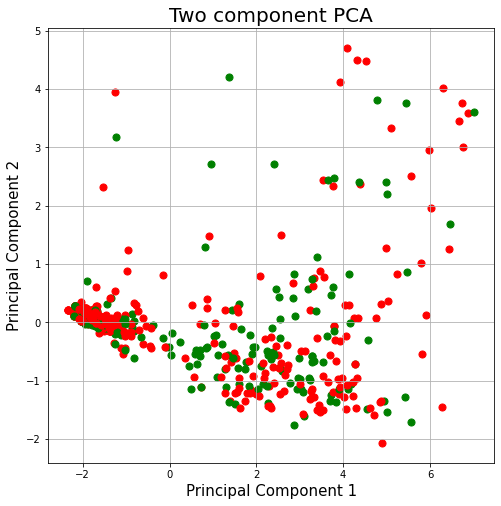

In [40]:
#visualizing
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two component PCA', fontsize = 20)

for i in range (699):
  if finalDF.loc[i, 'Class'] == 2.0:
    ax.scatter(finalDF.loc[i, 'principal component 1']
               , finalDF.loc[i, 'principal component 2']
               , c = 'r'
               , s = 50)
  else:
    ax.scatter(finalDF.loc[i, 'principal component 1']
               , finalDF.loc[i, 'principal component 2']
               , c = 'g'
               , s = 50) 

ax.grid()

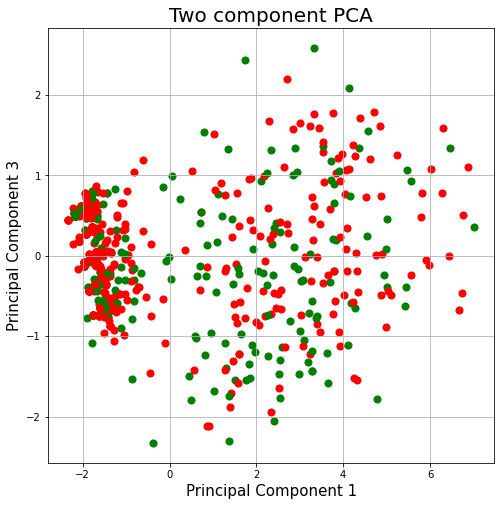

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('Two component PCA', fontsize = 20)

for i in range (699):
  if finalDF.loc[i, 'Class'] == 2.0:
    ax.scatter(finalDF.loc[i, 'principal component 1']
               , finalDF.loc[i, 'principal component 3']
               , c = 'r'
               , s = 50)
  else:
    ax.scatter(finalDF.loc[i, 'principal component 1']
               , finalDF.loc[i, 'principal component 3']
               , c = 'g'
               , s = 50) 

ax.grid()

In [43]:
#you are now probably wondering ....what pcs should be used. 1&2 or 1&3 or .....
pca.explained_variance_ratio_
#you will use the first three PC1, PC2, PC3...80% total variance would be good enough!!!!

array([0.65549993, 0.08621632, 0.05991692, 0.05106972, 0.04225287])

In [57]:
#so now we know the three PC are enough, so using these three we will apply for what?
#classification.... 
pca = PCA(5)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_train_tf = pca.transform(X_train)
X_test_tf = pca.transform(X_test)

In [0]:
#now you can use whatever classification techniques (SVM, ....) you want to use. 
# I am using Loglinear ...

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver = 'lbfgs')

In [60]:
logistic.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
yhat_LR_PCA = logistic.predict(X_test_tf)
yhat_LR_PCA

array([2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4,
       4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4,
       4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4,
       2, 2, 4, 2, 4])

In [62]:
logistic.score(X_test_tf, y_test)

0.948905109489051

In [63]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_LR_PCA, average = 'weighted')

0.9488064763046207

In [0]:
# when you apply PCA, your original data are transformed to be fit better for your classification techniques. 
# torture the data before they confess....(philosophy)

#K-Means 

In [64]:
import pandas as pd
cust_df = pd.read_csv("/content/drive/My Drive/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [65]:
#address is text information, so we need to drop it out...
 = cust_df.drop('Address', axis = 1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [69]:
#the data should be normalized..scaled...
from sklearn.preprocessing import StandardScaler

X = df.values[:, 1:]
X = np.nan_to_num(X)
Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [76]:
#applying K-means algorithms 
from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(Clus_dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [77]:
labels = k_means.labels_
labels

array([0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2,
       0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0,

In [0]:
#Insert the K-means outcome at the end of the data frame 
df["K-Means outcome"] = labels

In [79]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,K-Means outcome
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


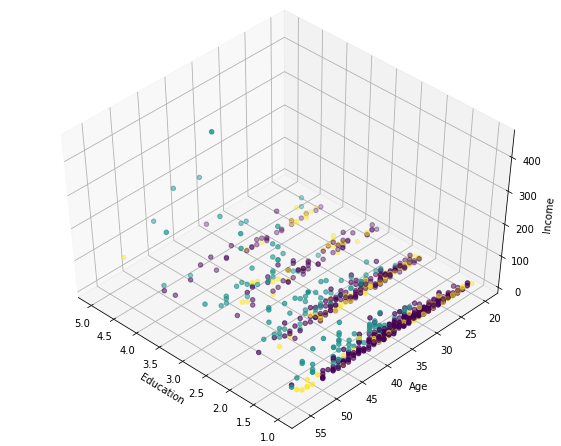

In [80]:
#you might some visualization....

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Years Employed')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

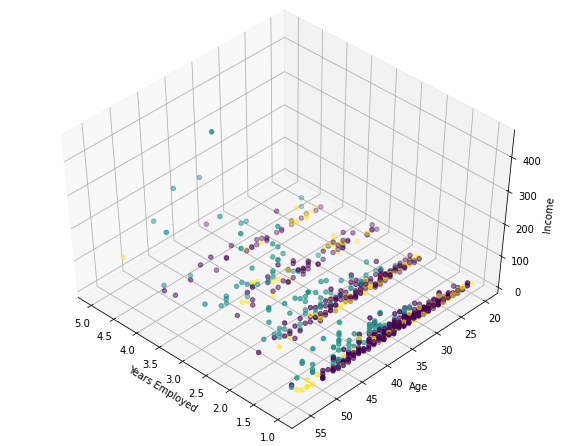

In [81]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Years Employed')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

#Hiercrachical Clustering...

In [0]:
#one of the limitations of the K-means is that K should be your call... 
#more freedome to select your call (means that the number of groups!!!!)

In [0]:
filename = '/content/drive/My Drive/cars_clus.csv'

In [0]:
pdf = pd.read_csv(filename)

In [89]:
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [0]:
#applying the HC needs to more data cleasning...
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)

In [0]:
#we have 13 features...wow!! 
# now we can do some selections from the 13 features...

# Now I am selecting the eight features for my interests

featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [92]:
#now we need the scaling of the data needed from the eight features data set 
#sometimes, you might think the different scaleing techniques that make your data looks better for analysis (something like maxmin scaler)

from sklearn.preprocessing import MinMaxScaler
X = featureset.values
min_max_scaler = MinMaxScaler()

feature_mtx = min_max_scaler.fit_transform(X)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [93]:
#SKlearn does not provide the HC, instead we have to make HC from scratch using Scipy library...(godd function/algorthm for Eucliena distance)

import scipy

leng = feature_mtx.shape[0]

D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  import sys


In [96]:
import pylab
from scipy.cluster import hierarchy

Z = hierarchy.linkage(D, 'complete')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


In [0]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, 3, criterion ='distance')

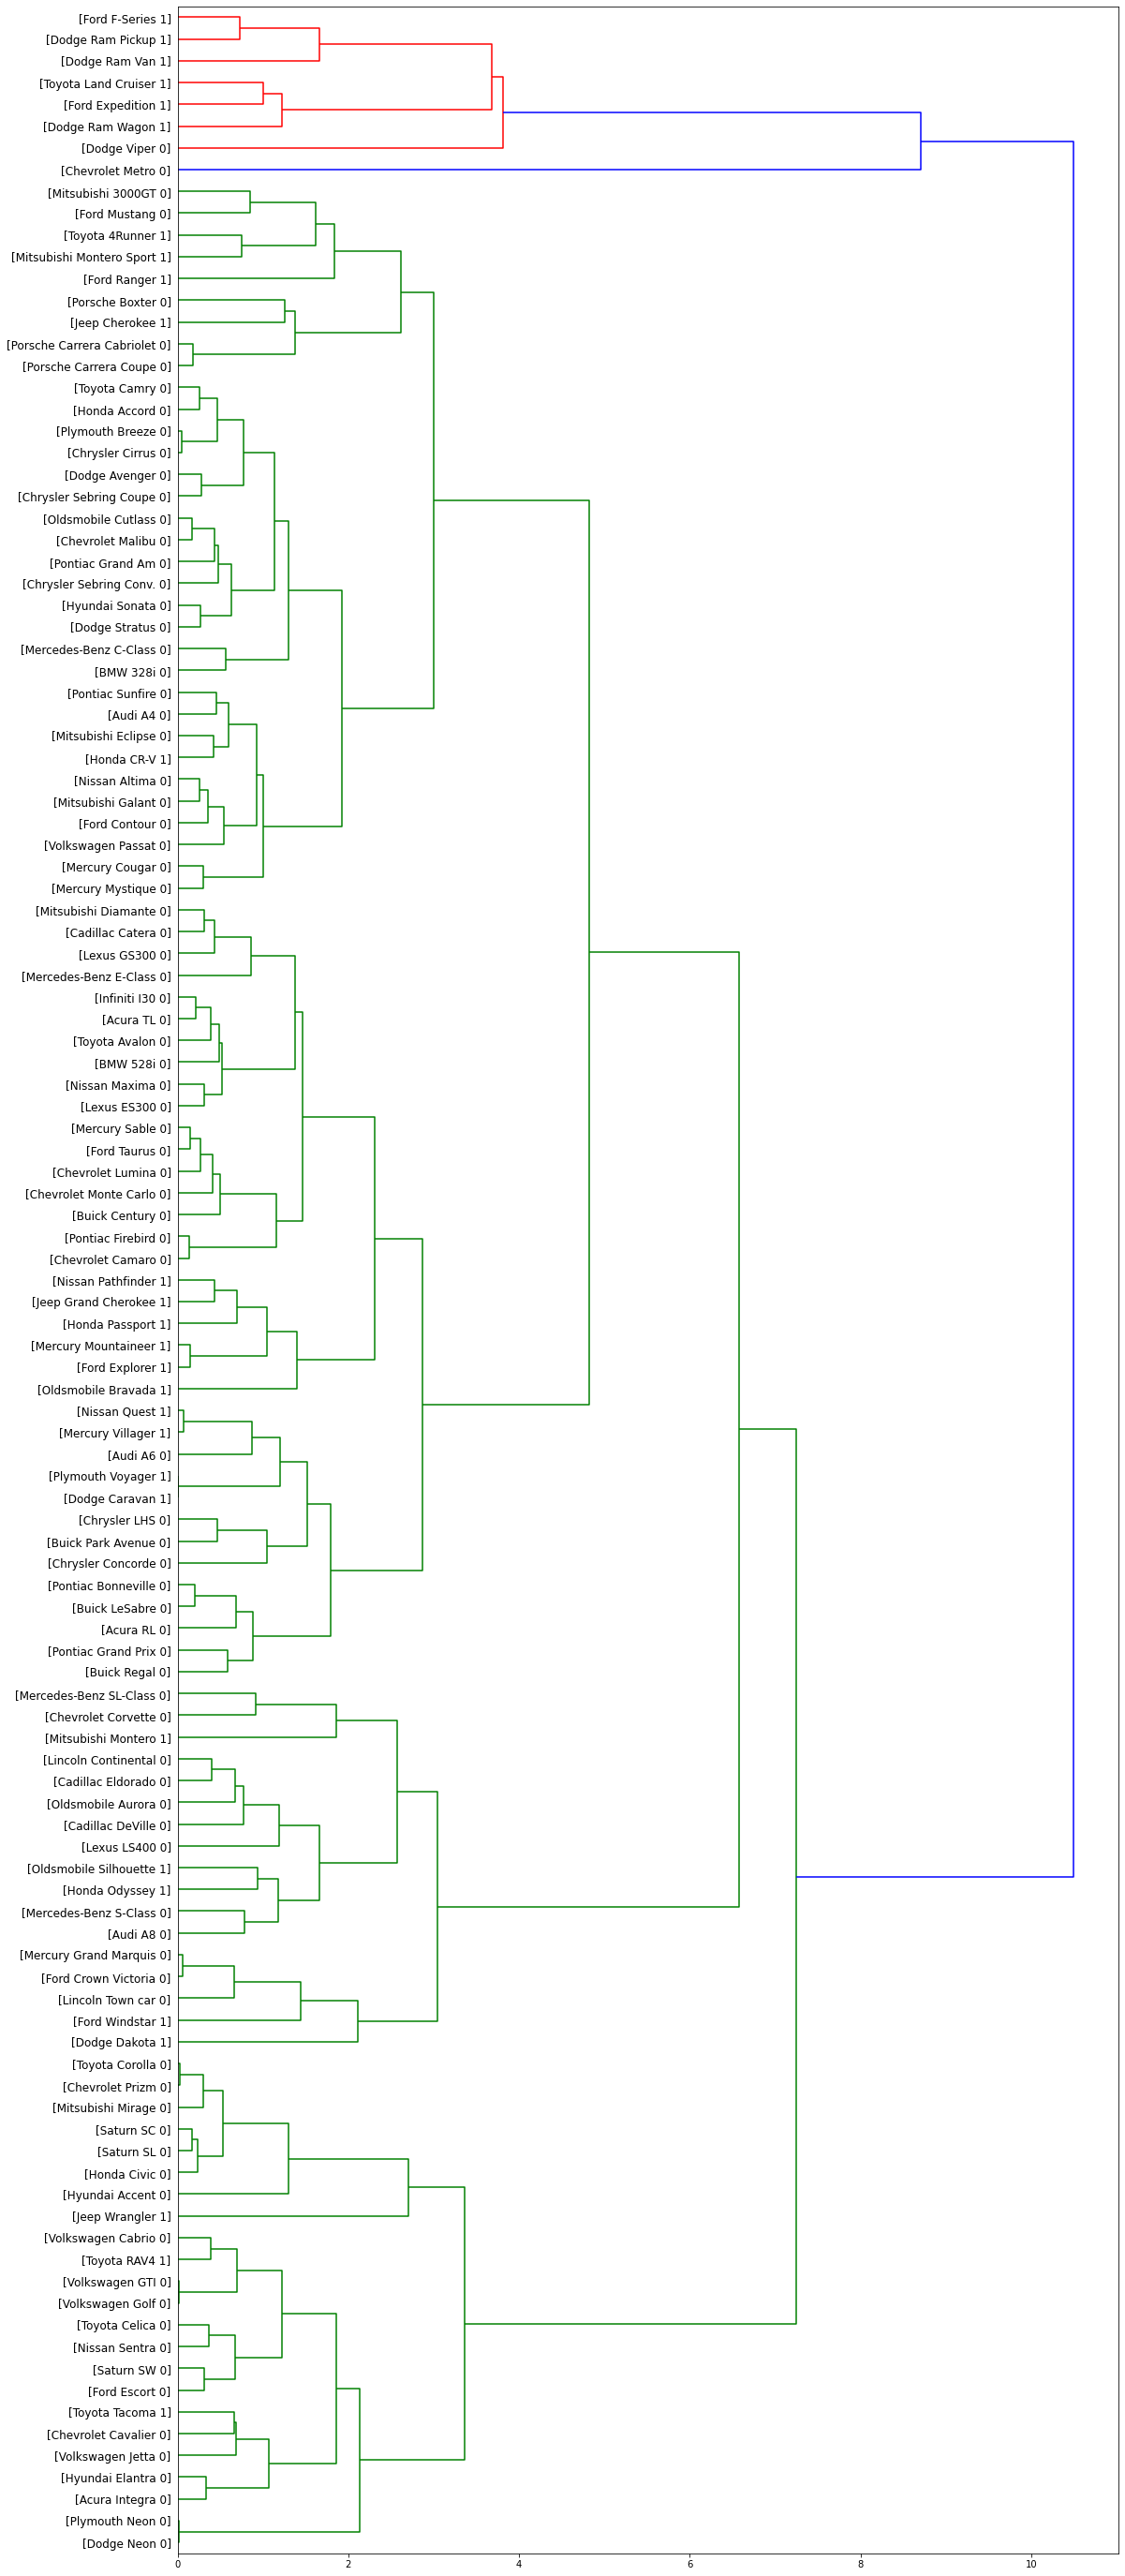

In [98]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

#DBSCN

Density-based Clustering...
(either K-Means or DBSCAN)

Another good thing of DBSCAN is to automatically delete te outliers (that cannot contribute the clustering) 

In [1]:
import csv
import pandas as pd
import numpy as np

filename='/content/drive/My Drive/weather-stations20140101-20141231.csv'

pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [2]:
#data cleaning...just for your example.... 

pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,0.0,NaN,NaN,NaN,81.0,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


In [101]:
#DBSCAN need some new library for visualization.. 
!apt install proj-bin libproj-dev libgeos-dev


Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 32 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 1s (249 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144467 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Prepari

In [102]:
!pip install git+https://github.com/matplotlib/basemap.git

  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-164tk4g8
  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-164tk4g8
     |████████████████████████████████| 10.9MB 4.3MB/s 
     |████████████████████████████████| 225kB 36.2MB/s 
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756025 sha256=d7caf393bc73fe0e937155a229d20654730858b8f8584d8e5c6aedfce010356e
  Stored in directory: /tmp/pip-ephem-wheel-cache-v57n5ovt/wheels/3f/f3/56/de548b66967d0d661612b7618022e2c0d4b86b9a638cf6ccf3
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=a230b2e053afad09ff876ed6053def4bf1bf32fa4075e342ed631bef908323f9
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built basemap pyshp


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


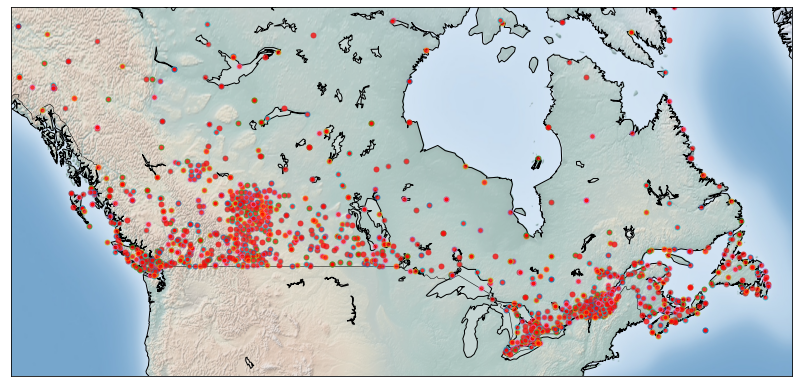

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()


In [5]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0) #outliers that cannot be grouped with the clusters 
clusterNum = len(set(labels)) 

# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0
5,GALIANO NORTH,13.5,8.9,0
6,MALAHAT,12.7,7.2,0
7,NORTH COWICHAN,14.7,7.7,0
8,NORTH PENDER ISLAND,14.0,8.6,0
9,RACE ROCKS,15.6,9.6,0


In [7]:
set(labels) #cluster -1 includes all the outliers data... 

{-1, 0, 1, 2, 3, 4}

Cluster 0, Avg Temp: -5.538747553816051
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


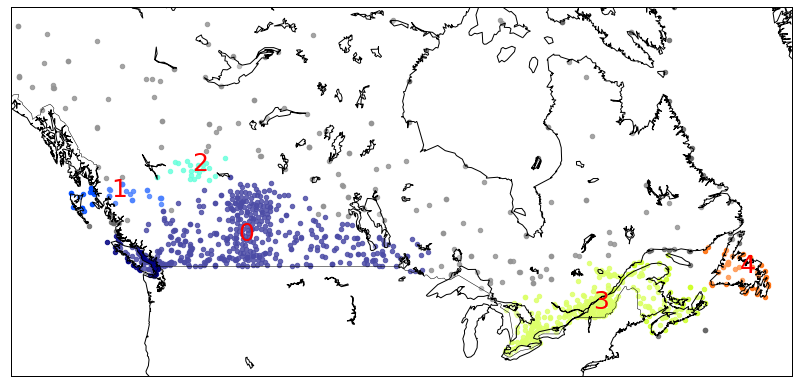

In [8]:
#delete all the outlier
#and the DBSCAN results is visuzalised

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))